In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-type-classification/weather_classification_data.csv


In [2]:
!pip install skimpy

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uninstalling typeguard-4.1.5:
      Successfully uninstalled typeguard-4.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 16.1.0 which is incompatible.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is i

## Loading the dataset.

In [3]:
from skimpy import skim

In [4]:
df = pd.read_csv('/kaggle/input/weather-type-classification/weather_classification_data.csv')

In [5]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 13200  │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 11     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Temperature              │   0 │     0 │  19.13 │  17.39 │    -25 │      4 │    21 │    31 │  109 │  ▂▅▇▁  │  │
│ │ Humidity                 │   0 │     0 │  68.71 │  20.19 │     20 │     57 │    70 │    84 │  109 │ ▂▂▆▇▅▃ │  │
│ │ Wind Speed               │   0 │     0 │  9.832 │  6.909 │      0 │      5 │     9 │  13.5 │ 48.5 │  ▇▇▂   │  │
│ │ Precipitation (%)        │   0 │     0 │  53.64 │  31.95 │      0 │     19 │    58 │    82 │  109 │ ▇▃▅▆▇▅ │  │
│ │ Atmospheric Pressure     │   0 │     0 │   1006 │   37.2 │  800.1 │  994.8 │  1008 │  1017 │ 1199 │    ▃▇  │  │
│ │ UV Index                 │   0 │     0 │  4.006 │  3.857 │      0 │      1 │     3 │     7 │   14 │ ▇▃▁▂▁▁ │  │
│ │ Visibility (km)          │   0 │     0 │  5.463 │  3.371 │      0 │      3 │     5 │   7.5 │   20 │  ▆▇▅▁  │  │
│ └──────────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴───────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Cloud Cover                │      0 │          0 │                          1.3 │                    17760 │  │
│ │ Season                     │      0 │          0 │                            1 │                    13200 │  │
│ │ Location                   │      0 │          0 │                            1 │                    13200 │  │
│ │ Weather Type               │      0 │          0 │                            1 │                    13200 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## from above summary we can see the following:
> * ##### The number of numerical and categorical variables.
> * ##### shape of data.
> * ##### description containing mean, std, distribution, hist.
> * ##### null values present  (there are no null values.)

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [9]:
numerical_columns = df.select_dtypes(exclude='object').columns.to_list()
categorical_columns = df.select_dtypes(include='object').columns.to_list()
print(numerical_columns)
print(categorical_columns)

['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
['Cloud Cover', 'Season', 'Location', 'Weather Type']


# Univariate Analysis

Text(0.5, 1.0, 'Count plot of target variable: Weather Type')

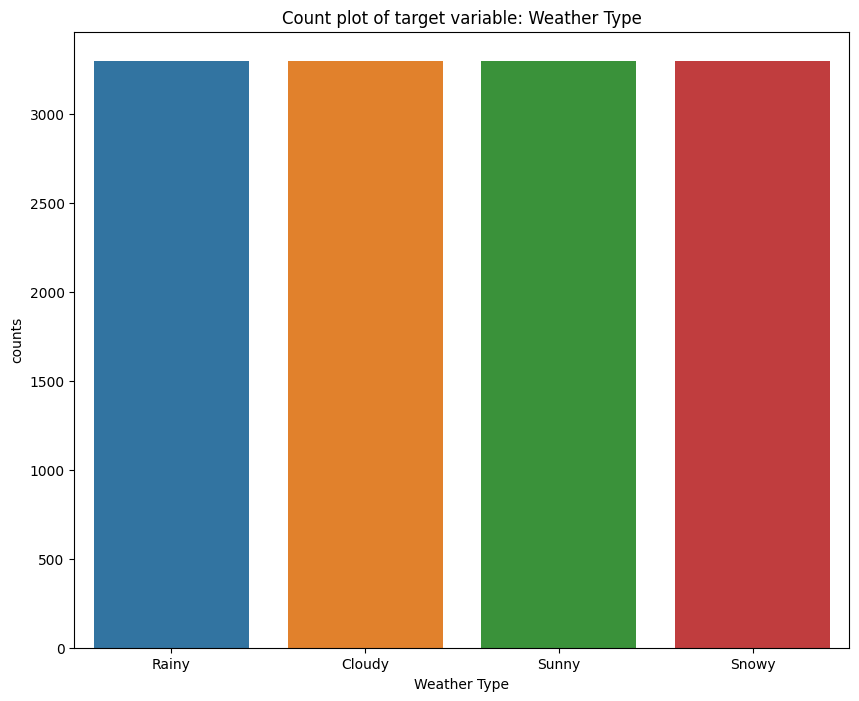

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('counts')
plt.title('Count plot of target variable: Weather Type')

# the target varibale is equally distributed for each weather type.

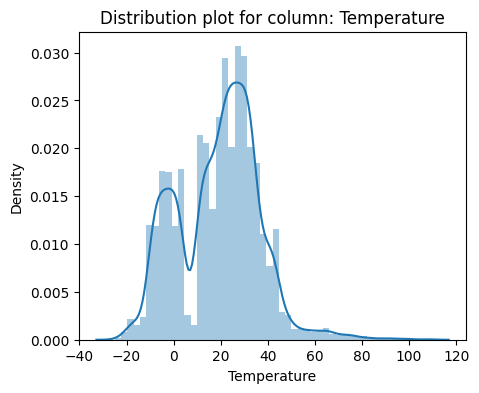

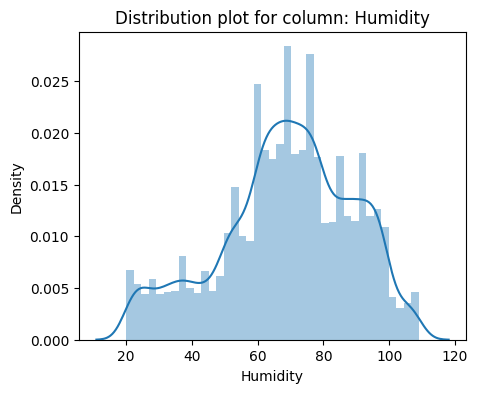

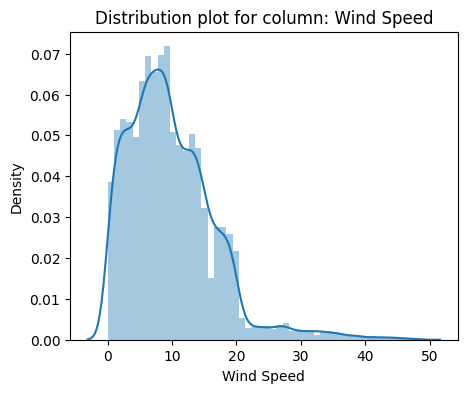

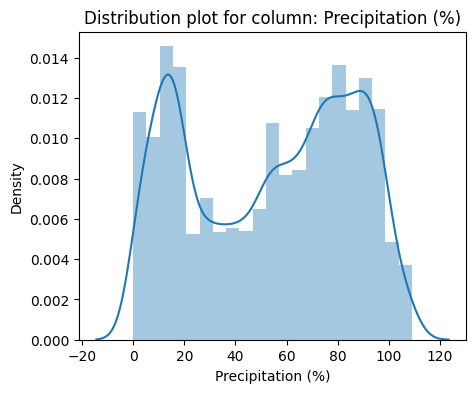

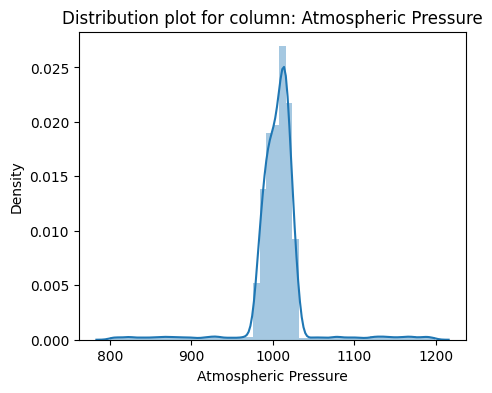

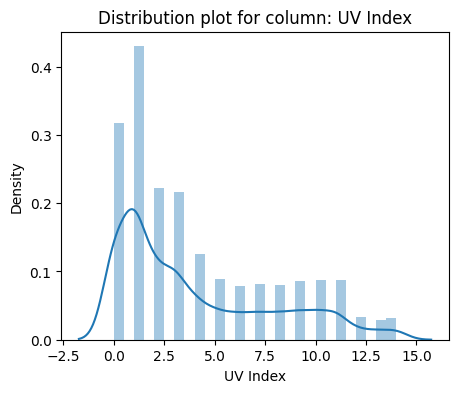

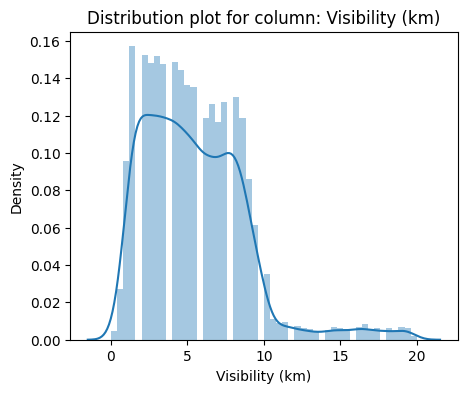

In [11]:
import warnings
warnings.filterwarnings('ignore')


for column in numerical_columns :
    plt.figure(figsize=(5,4))
    sns.distplot(df[column])
    plt.xlabel(column)
    plt.title("Distribution plot for column: "+ column)

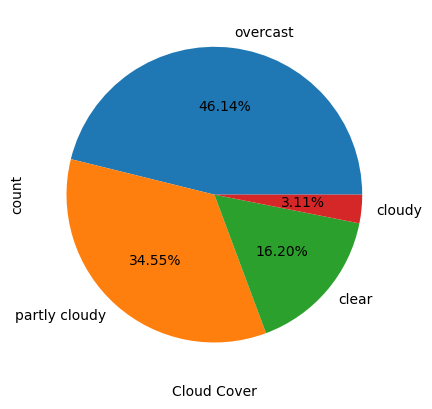

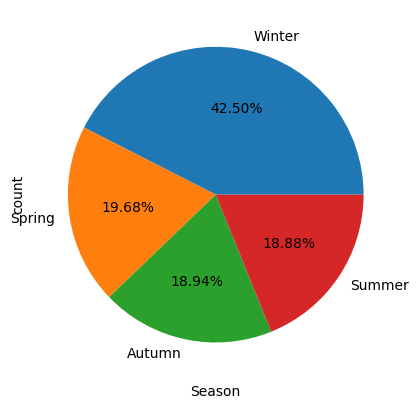

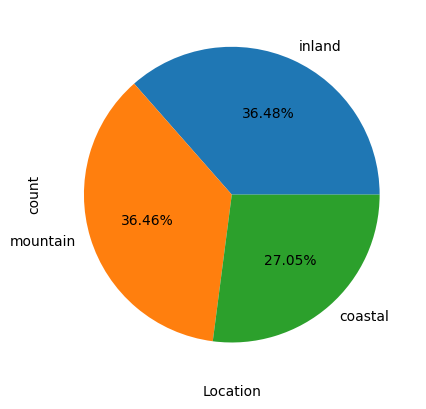

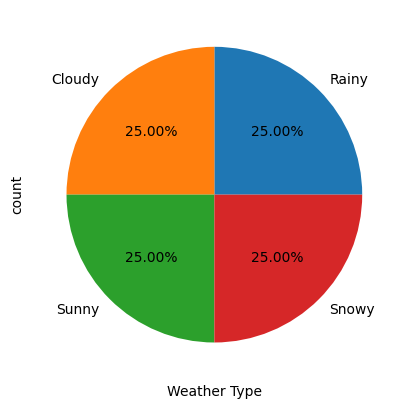

In [12]:
for col in categorical_columns:
    df[col].value_counts().plot(kind ='pie', autopct = '%.2f%%')
    plt.xlabel(col)
    plt.show()

<Axes: >

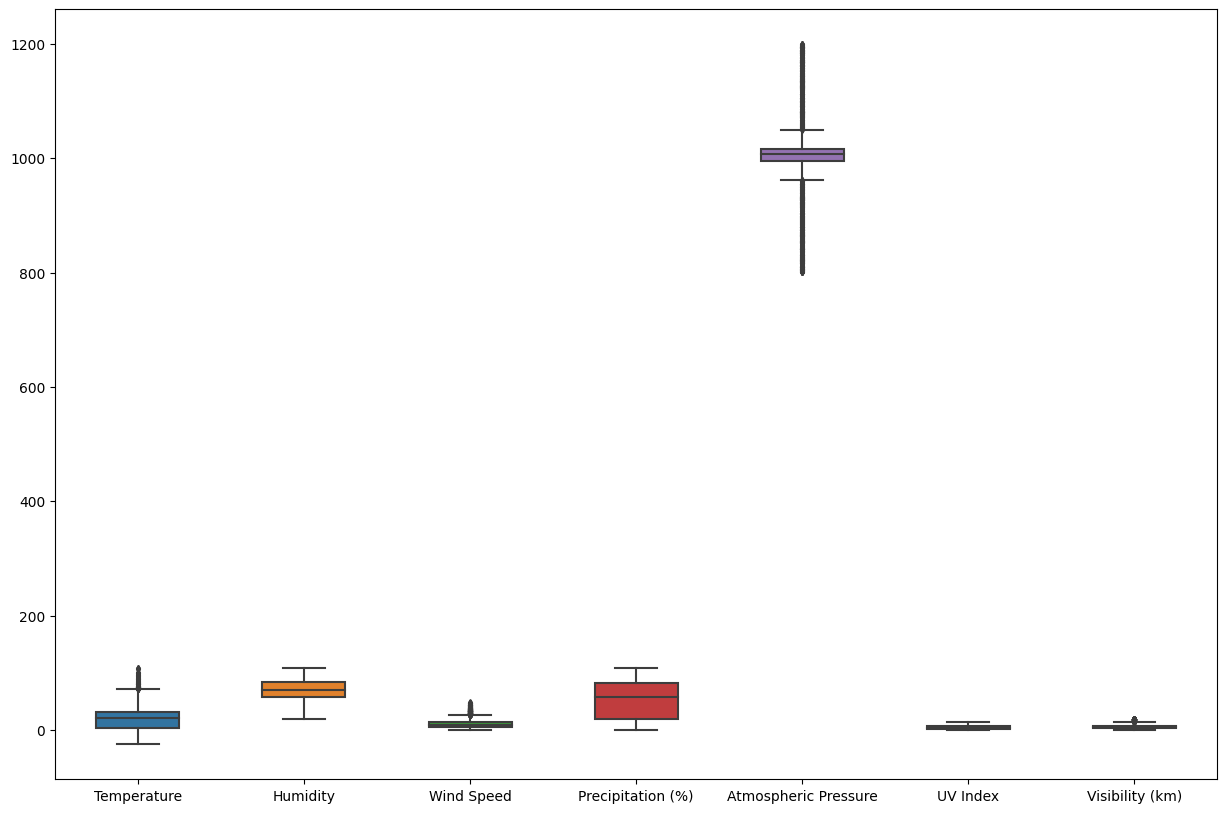

In [13]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
X = df.drop('Weather Type', axis=1)
Y = df['Weather Type']

In [16]:
categorical_columns

['Cloud Cover', 'Season', 'Location', 'Weather Type']

In [17]:
categorical_columns.pop()

'Weather Type'

In [18]:
lencoder = LabelEncoder()
for col in categorical_columns:
    X[col] = lencoder.fit_transform(X[col])

In [19]:
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2


In [20]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
columns = X.columns.tolist()
X_scaled = X.copy()
X_scaled[columns] = sscaler.fit_transform(X[columns])

In [21]:
X_scaled.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,-0.294931,0.212404,-0.048086,0.887629,0.997539,0.134203,-0.520104,0.987831,-0.582231,-0.118893
1,1.143035,1.351385,-0.192836,0.543291,0.997539,0.150602,0.776424,-0.729231,1.345768,-0.118893
2,0.625367,-0.233285,-0.409962,-1.178401,-1.966116,0.346579,0.257813,-0.729231,0.010999,1.144706
3,1.085516,0.707613,-1.206089,0.887629,-1.966116,0.549008,0.776424,-0.729231,-1.323769,-1.382492
4,0.452811,0.261924,1.037543,0.386773,0.009654,-0.407490,-0.779410,0.987831,-0.878846,1.144706


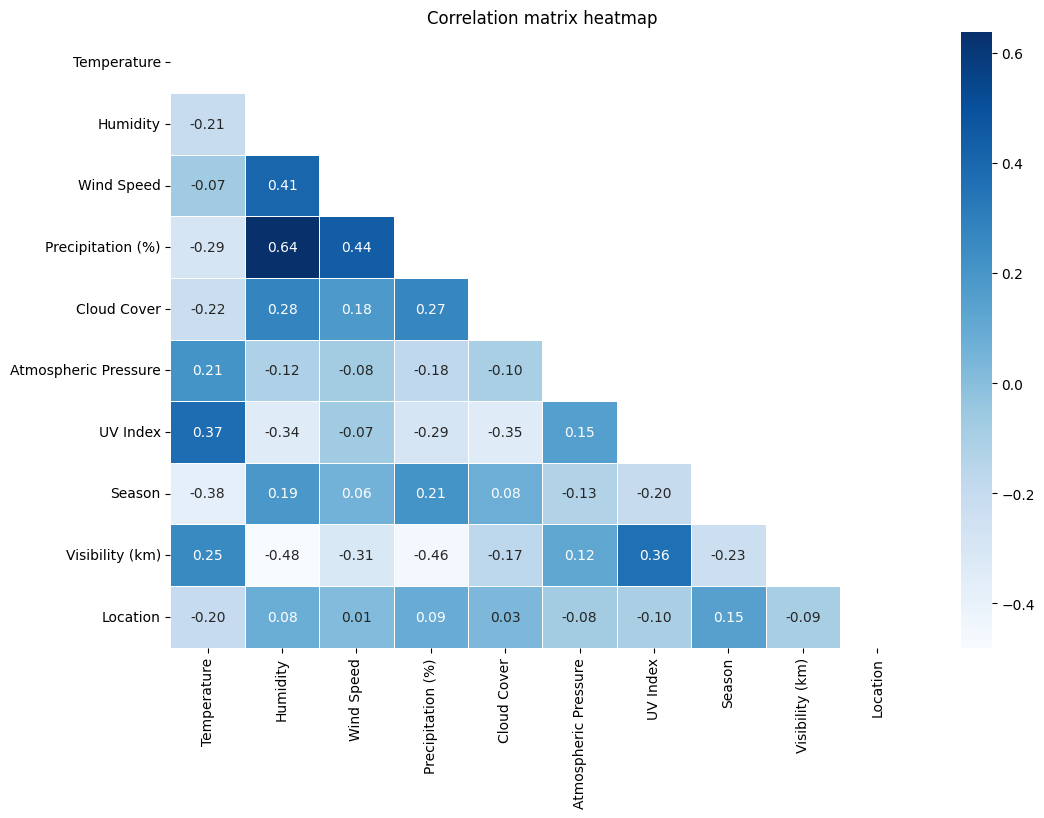

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(),mask = np.triu(np.ones_like(X.corr())), annot=True, cmap ='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix heatmap')
plt.show()

* #### The highest correlation is between humidity and Precipitation 
* #### other highly correlated once are precipitation - wind speed, visibility - humidity
* #### the least correlated once are location, cloud cover, uv index.

## Model Building

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(10560, 10)

In [25]:
X_test.shape

(2640, 10)

In [26]:
Y_train.shape

(10560,)

In [27]:
Y_test.shape

(2640,)

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)
print(classification_report(Y_test, Y_pred))

0.8492424242424242
              precision    recall  f1-score   support

      Cloudy       0.82      0.80      0.81       651
       Rainy       0.81      0.85      0.83       647
       Snowy       0.89      0.93      0.91       701
       Sunny       0.87      0.81      0.84       641

    accuracy                           0.85      2640
   macro avg       0.85      0.85      0.85      2640
weighted avg       0.85      0.85      0.85      2640



In [30]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
Y_pred1 = dtree.predict(X_test)
accuracy1 = accuracy_score(Y_test, Y_pred1)
print(accuracy1)
print(classification_report(Y_test, Y_pred1))


0.906060606060606
              precision    recall  f1-score   support

      Cloudy       0.87      0.89      0.88       651
       Rainy       0.90      0.89      0.89       647
       Snowy       0.93      0.95      0.94       701
       Sunny       0.92      0.90      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [31]:
from sklearn.ensemble  import RandomForestClassifier

rforest = RandomForestClassifier()
rforest.fit(X_train, Y_train)
Y_pred2 = rforest.predict(X_test)
accuracy2 = accuracy_score(Y_test, Y_pred2)
print(accuracy2)
print(classification_report(Y_test, Y_pred2))

0.915530303030303
              precision    recall  f1-score   support

      Cloudy       0.87      0.90      0.89       651
       Rainy       0.91      0.91      0.91       647
       Snowy       0.94      0.94      0.94       701
       Sunny       0.94      0.90      0.92       641

    accuracy                           0.92      2640
   macro avg       0.92      0.91      0.92      2640
weighted avg       0.92      0.92      0.92      2640



#### the highest accuracy is given by random forest classifier. with accuracy of 0.91